In [1]:
# imports
import pandas as pd
from datetime import date
import time
import calendar
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


file_name = "../Traffic_Violations.csv"
df = pd.read_csv(file_name)

In [2]:
# Investigating all the descriptions of traffic violations in 
# this csv
# What can we eliminate? There's a grand total of 13,593 descriptions!
# Maybe let's just keep what we're really interested in - drunk driving and texting and driving allegations
# Charge is probably related to traffic codes: https://www.tmwilsonlaw.com/traffic-law/reckless-driving
df['Description'].value_counts()


DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                              118594
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                       68726
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                   47417
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND                38103
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                             35387
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                                34443
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                                 33040
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE        29105
DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REGISTRATION PLATES AND VALIDATION TABS                       23905
E

In [3]:
# Let's drop the columns we deem irrelevant!
filtered_cols_df = df.drop(['Driver City', 'Driver State','DL State', 'Arrest Type','Agency', 'SubAgency', 'Location', 'Latitude', 'Longitude', 'HAZMAT', 'Work Zone', 'Geolocation'], axis=1)
filtered_cols_df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Description', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'Commercial Vehicle', 'Alcohol', 'State', 'VehicleType', 'Year', 'Make',
       'Model', 'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender'],
      dtype='object')

In [4]:
# Change all Date Of Stop dates to weekdays. Hopefully I can find patterns regarding when violations occur during the week
filtered_cols_df['Date Of Stop'] = filtered_cols_df['Date Of Stop'].map(lambda a: time.strftime("%A", time.strptime(a, "%m/%d/%Y")))

# Time Of Stop is now modified with just the hour of the day in military time
filtered_cols_df['Time Of Stop'] = filtered_cols_df['Time Of Stop'].map(lambda a: time.strftime("%H", time.strptime(a, "%H:%M:%S")))

In [5]:
# Take out only the drunk driving related incidents
drunk_driving_df = filtered_cols_df[(filtered_cols_df['Description'] == 'DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF ALCOHOL')]
drunk_driving_df_2 = filtered_cols_df[(filtered_cols_df['Description'] == 'DRIVING WHILE IMPAIRED BY ALCOHOL')]
drunk_driving_df.append(drunk_driving_df_2)
drunk_driving_df.head

<bound method NDFrame.head of         Date Of Stop Time Of Stop  \
51           Tuesday           00   
98           Tuesday           01   
204         Saturday           22   
259         Saturday           22   
326        Wednesday           02   
331         Thursday           01   
354           Friday           00   
464         Thursday           23   
475         Saturday           02   
505           Sunday           22   
662           Friday           21   
687         Thursday           00   
698           Sunday           23   
769           Friday           01   
814           Friday           01   
875           Monday           23   
963           Sunday           08   
1028       Wednesday           01   
1073          Sunday           01   
1074        Saturday           06   
1125         Tuesday           21   
1205       Wednesday           18   
1294       Wednesday           02   
1310          Monday           01   
1336         Tuesday           02   
1373    

In [6]:
# All of these charges seem the same.
# Maryland Transportation Code 21-902(a1): "A person may not drive or attempt to drive any vehicle 
# while under the influence of alcohol."
# https://law.justia.com/codes/maryland/2005/gtr/21-902.html

# No cases of violation related to drunk driving while transporting a minor.

drunk_driving_df['Charge'].value_counts()


21-902(a1)      14824
21-902(a1i)      3079
2 1-902(a1i)       70
21-902(a1I)         1
Name: Charge, dtype: int64

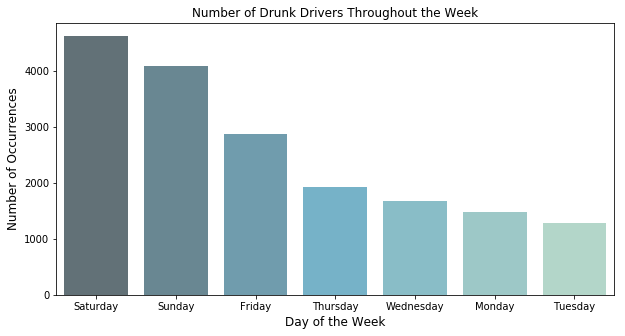

In [7]:
plt.figure(figsize=(10,5))
day_counts = pd.value_counts(drunk_driving_df['Date Of Stop'])
sns.barplot(day_counts.index, day_counts.values, alpha=0.8, palette=sns.color_palette("GnBu_d", len(day_counts)))
plt.title('Number of Drunk Drivers Throughout the Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.show()

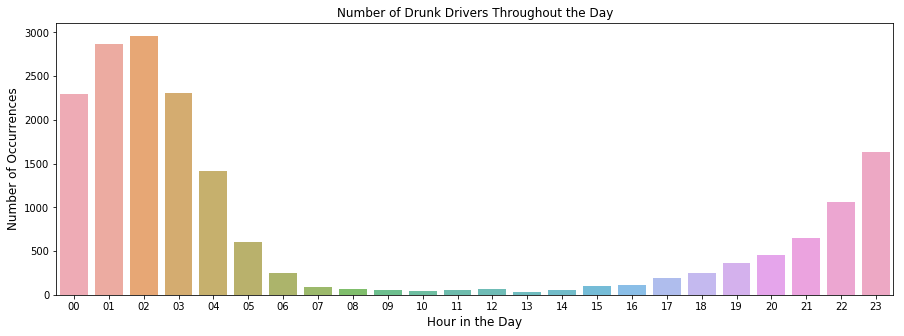

In [8]:
plt.figure(figsize=(15,5))
hour_counts = pd.value_counts(drunk_driving_df['Time Of Stop'])
sns.barplot(hour_counts.index, hour_counts.values, alpha=0.8)
plt.title('Number of Drunk Drivers Throughout the Day')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour in the Day', fontsize=12)
plt.show()

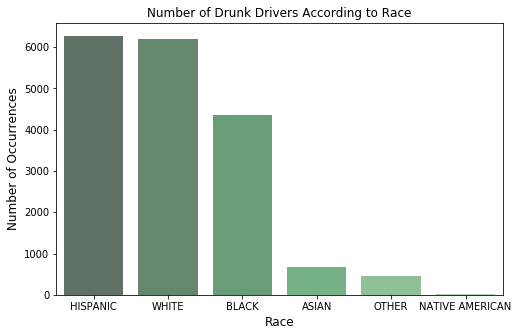

In [9]:
plt.figure(figsize=(8,5))
race_counts = pd.value_counts(drunk_driving_df['Race'])
sns.barplot(race_counts.index, race_counts.values, alpha=0.8, palette=sns.color_palette("Greens_d", len(race_counts)))
plt.title('Number of Drunk Drivers According to Race')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

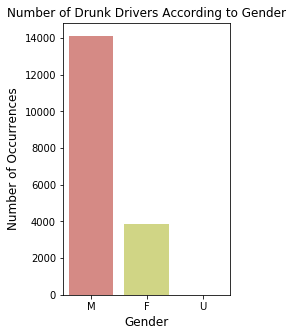

In [10]:
plt.figure(figsize=(3,5))
gender_counts = pd.value_counts(drunk_driving_df['Gender'])
sns.barplot(gender_counts.index, gender_counts.values, alpha=0.8, palette=sns.color_palette("hls", len(race_counts)))
plt.title('Number of Drunk Drivers According to Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

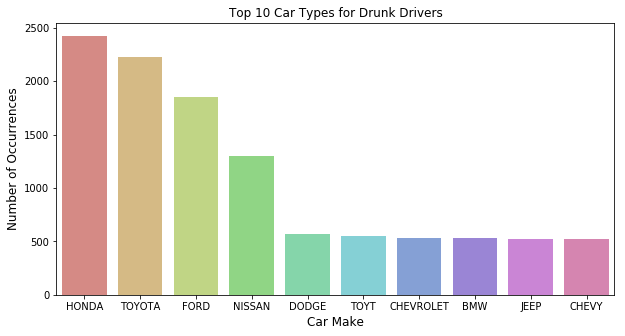

In [11]:
plt.figure(figsize=(10,5))
car_counts = pd.value_counts(drunk_driving_df['Make'])
car_counts = car_counts[:10,]
sns.barplot(car_counts.index, car_counts.values, alpha=0.8, palette=sns.color_palette("hls", len(car_counts)))
plt.title('Top 10 Car Types for Drunk Drivers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Make', fontsize=12)
plt.show()

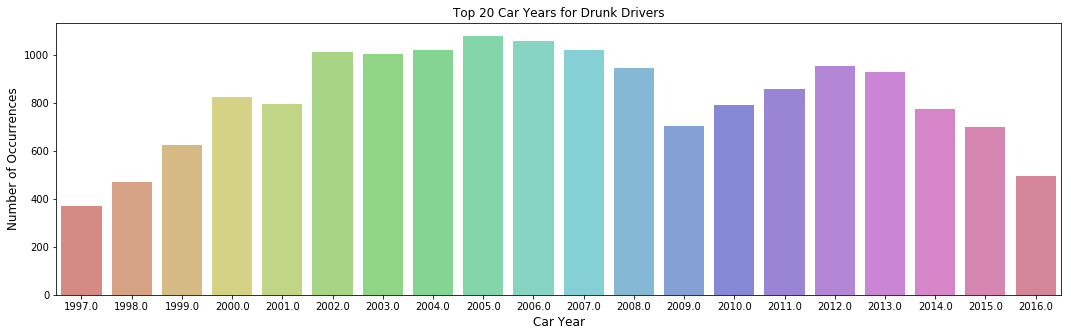

In [12]:
plt.figure(figsize=(18,5))
year_counts = pd.value_counts(drunk_driving_df['Year'])
year_counts = year_counts[:20,]
sns.barplot(year_counts.index, year_counts.values, alpha=0.8, palette=sns.color_palette("hls", len(year_counts)))
plt.title('Top 20 Car Years for Drunk Drivers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Year', fontsize=12)
plt.show()

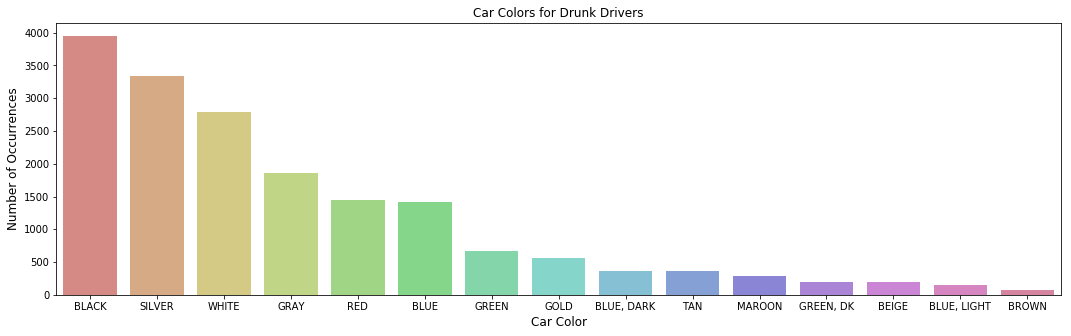

In [13]:
plt.figure(figsize=(18,5))
color_counts = pd.value_counts(drunk_driving_df['Color'])
color_counts = color_counts[:15,]
sns.barplot(color_counts.index, color_counts.values, alpha=0.8, palette=sns.color_palette("hls", len(color_counts)))
plt.title('Car Colors for Drunk Drivers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Car Color', fontsize=12)
plt.show()

In [14]:
# Maybe try to predict how likely someone is going to contribute to an accident when drunk driving?
drunk_driving_df['Contributed To Accident'].value_counts()

No     16731
Yes     1243
Name: Contributed To Accident, dtype: int64

In [15]:
# Take out only the texting and driving related incidents
texting_driving_df = filtered_cols_df[(filtered_cols_df['Description'] == 'DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION')]

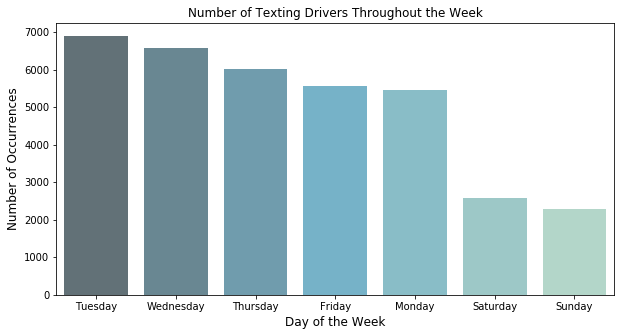

In [16]:
plt.figure(figsize=(10,5))
day_counts = pd.value_counts(texting_driving_df['Date Of Stop'])
day_counts = day_counts[:15,]
sns.barplot(day_counts.index, day_counts.values, alpha=0.8, palette=sns.color_palette("GnBu_d", len(day_counts)))
plt.title('Number of Texting Drivers Throughout the Week')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.show()

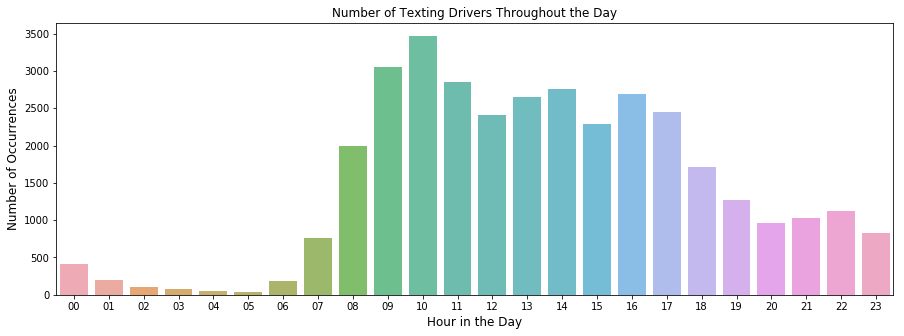

In [17]:
plt.figure(figsize=(15,5))
hour_counts = pd.value_counts(texting_driving_df['Time Of Stop'])
sns.barplot(hour_counts.index, hour_counts.values, alpha=0.8)
plt.title('Number of Texting Drivers Throughout the Day')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Hour in the Day', fontsize=12)
plt.show()

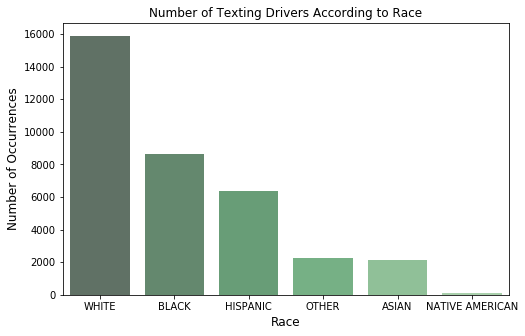

In [18]:
plt.figure(figsize=(8,5))
race_counts = pd.value_counts(texting_driving_df['Race'])
sns.barplot(race_counts.index, race_counts.values, alpha=0.8, palette=sns.color_palette("Greens_d", len(race_counts)))
plt.title('Number of Texting Drivers According to Race')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

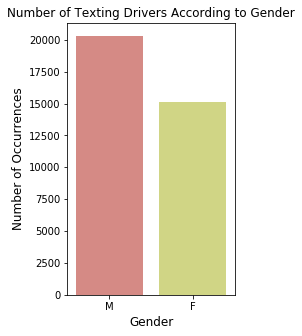

In [19]:
plt.figure(figsize=(3,5))
gender_counts = pd.value_counts(texting_driving_df['Gender'])
sns.barplot(gender_counts.index, gender_counts.values, alpha=0.8, palette=sns.color_palette("hls", len(race_counts)))
plt.title('Number of Texting Drivers According to Gender')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

In [20]:
# Maybe try to predict how likely someone is going to contribute to an accident when texting and driving?
texting_driving_df['Contributed To Accident'].value_counts()

No     35244
Yes      143
Name: Contributed To Accident, dtype: int64